In [15]:
#bookmark: https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/regular-expressions-word-tokenization?ex=6
import matplotlib.pyplot as plt

my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

# Import the regex module
import re

# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [16]:
#set up string scene_one to be analyzed
#from urllib2 import urlopen
import urllib as u2
import os

#os.makedirs('tokenizers/punkt/PY3/')
u2.urlretrieve('https://s3.amazonaws.com/assets.datacamp.com/production/course_3747/datasets/english_pickle.txt', 'tokenizers/punkt/PY3/english.pickle')
holy_grail = u2.urlopen('https://s3.amazonaws.com/assets.datacamp.com/production/course_3747/datasets/grail.txt').read().decode('utf-8')
scene_one = holy_grail[:holy_grail.find("SCENE 2")]

scene_one                                        

u"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a 

In [17]:
'''
download if necessary
import nltk
nltk.download('punkt')

details: https://stackoverflow.com/questions/4867197/failed-loading-english-pickle-with-nltk-data-load
'''

"\ndownload if necessary\nimport nltk\nnltk.download('punkt')\n\ndetails: https://stackoverflow.com/questions/4867197/failed-loading-english-pickle-with-nltk-data-load\n"

In [18]:
#Word tokenization with NLTK

'''
sent_tokenize: tokenize a document into sentences

regexp_tokenize: tokenize a string or document based on a regular expression pattern
e.g. regexp_tokenize(s2, r'[,\.\?!"]\s*', gaps=False)

http://www.nltk.org/_modules/nltk/tokenize/regexp.html
The function ``regexp_tokenize()`` takes the text as its
first argument, and the regular expression pattern as its second
argument.  This differs from the conventions used by Python's
``re`` functions, where the pattern is always the first argument.
(This is for consistency with the other NLTK tokenizers.)

'''

# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)


In [19]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

set([u'breadth', u'all', u'just', u'What', u'course', u'clop', u'go', u'yet', u'European', u'Ridden', u'We', u'zone', u'No', u',', u'wings', u'to', u'ARTHUR', u'interested', u'strand', u'under', u'Not', u'lord', u'he', u'Wait', u'kingdom', u'...', u'them', u'SCENE', u'get', u'beat', u'swallows', u'anyway', u'five', u'they', u'not', u'using', u'son', u'Where', u'grips', u'minute', u'England', u'bring', u'servant', u'Pendragon', u"'ve", u'this', u'swallow', u'guiding', u'martin', u'through', u'air-speed', u'where', u'mean', u'right', u'weight', u'King', u'house', u'feathers', u'Uther', u'line', u'SOLDIER', u'second', u'husk', u'warmer', u'are', u'our', u'Whoa', u'Listen', u'KING', u'#', u'trusty', u"'", u'That', u'sun', u'since', u'its', u'strangers', u'halves', u'does', u'forty-three', u'goes', u'suggesting', u'got', u'bird', u'?', u'Are', u'Pull', u'use', u'here', u'Arthur', u'non-migratory', u'ratios', u'found', u'ask', u'[', u'by', u'every', u'on', u'search', u'carried', u'of', u'cou

In [20]:
#More regex with re.search()

'''
match: matches a pattern with a string. It takes the pattern as the first argument, the string as the second and returns a match object

Difference between match and search:
 match will try and match a string from the beginning until it cannot match any longer
 
Search will go through the ENTIRE string to look for match options. 
If you need to find a pattern that might not be at the beginning of the string, you should use search. 
If you want to be specific about the composition of the entire string, or at least the initial pattern, then you should use match.
'''
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))



(580, 588)


Use | for OR

To use the or, define a group using parenthesis. Groups can be either a pattern or a set of characters you want to match. You can also define explicit character classes using square brackets.

For example, 
match_digits_or_words = ('(\d+|\w+)')


In [21]:
#Regex with NLTK tokenization - Twitter

tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']


# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern1)

# Write a pattern that matches both mentions and hashtags
pattern2 = r"([@|#]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1], pattern2)

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t)  for t in tweets]
print(all_tokens)


[[u'This', u'is', u'the', u'best', u'#nlp', u'exercise', u'ive', u'found', u'online', u'!', u'#python'], [u'#NLP', u'is', u'super', u'fun', u'!', u'<3', u'#learning'], [u'Thanks', u'@datacamp', u':)', u'#nlp', u'#python']]


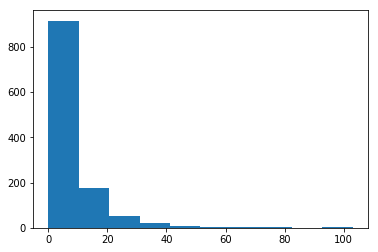

In [22]:
#Charting practice
'''
from nltk.tokenize import regexp_tokenize
from urllib.request import urlopen
import re
holy_grail = urlopen('https://s3.amazonaws.com/assets.datacamp.com/production/course_3747/datasets/grail.txt').read().decode('utf-8')
'''

# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist (line_num_words )

# Show the plot
plt.show()

